# RF Demo: Jupyter Notebook Walkthrough

This notebook demonstrates how to use the public repo's `rf_demo` pipeline to analyze and visualize large-scale mapping data. It covers repository setup, code exploration, running the pipeline, and visualizing results for reviewers.

## 1. Clone the Public Repository

Use the following command to clone the repository containing the demo code:

```bash
!git clone https://github.com/antonio-lozano/large-scale-mapping-review.git
```

If already cloned, skip this step.

## 2. Explore Existing Code and Data

List the files and folders in the repository to understand the available code and datasets:

```python
import os
from rf_demo.config import REPO_ROOT, SRC_ROOT, DATA_DIR
os.listdir(str(REPO_ROOT))
os.listdir(str(SRC_ROOT))
os.listdir(str(DATA_DIR))
```

## 3. Set Up Jupyter Notebook Environment

Install required Python packages and activate the environment:

```bash
# Environment is managed with uv (see README)
uv sync
```

If using a virtual environment, activate it before running the notebook.

## 4. Import Existing Modules

Import the main pipeline and visualization functions from the repository:

```python
import sys
sys.path.append('../src')
from rf_demo.pipeline import run_demo_pipeline
from rf_demo.visualization import plot_cortex_alignment, plot_visual_field_projection, plot_distance_heatmap, annotate_metrics
```

## 5. Run Existing Functions and Visualize Output

Run the demo pipeline for a monkey and display metrics and plots:

```python
output = run_demo_pipeline(monkey='monkey_L', window='15s')


3

Band: {params.get('freq_band', ''):8} n_neighbors: {params.get('n_neighbors', ''):2} min_dist: {params.get('min_dist', ''):4}  RMSE: {metrics.get('rmse', 0):.4f}  IEDC: {metrics.get('iedc', 0):.4f}  Combo: {combo_error:.4f}

plot_cortex_alignment(output)
plot_visual_field_projection(output)
plot_distance_heatmap(output.distance_matrix)
```

## 6. Add New Demo Cells

You can add new cells to:
- Try different monkeys or windows
- Change UMAP parameter grid for speed/accuracy
- Visualize additional metrics or custom plots

Example:
```python
output = run_demo_pipeline(monkey='monkey_A', window='15s')
plot_cortex_alignment(output)
```

Feel free to experiment and extend the notebook for your review or analysis needs.

In [1]:
# List files in repo and demo folders
import os
from rf_demo.config import REPO_ROOT, SRC_ROOT, DATA_DIR
print('Repo root:', os.listdir(str(REPO_ROOT)))
print('Demo src:', os.listdir(str(SRC_ROOT)))
print('Demo data:', os.listdir(str(DATA_DIR)))

Repo root: ['.git', '.github', '.gitignore', '.pytest_cache', '.venv', 'data', 'notebooks', 'pyproject.toml', 'QUICKSTART.md', 'README.md', 'requirements.txt', 'results', 'scripts', 'src', 'tests', 'uv.lock']
Demo src: ['config.py', 'data_loader.py', 'neural_unsupervised_electrode_mapping.egg-info', 'pipeline.py', 'rf_demo', 'visualization.py', '__init__.py']
Demo data: ['demo_monkey_a_alpha_15s.npz', 'demo_monkey_a_beta_15s.npz', 'demo_monkey_a_gamma_15s.npz', 'demo_monkey_a_highgamma_15s.npz', 'demo_monkey_a_lfp_15s.npz', 'demo_monkey_a_low_15s.npz', 'demo_monkey_l_alpha_15s.npz', 'demo_monkey_l_beta_15s.npz', 'demo_monkey_l_gamma_15s.npz', 'demo_monkey_l_highgamma_15s.npz', 'demo_monkey_l_lfp_15s.npz', 'demo_monkey_l_low_15s.npz']


In [2]:
# Import pipeline and visualization modules
import sys
sys.path.append('../src')
from rf_demo.pipeline import run_demo_pipeline
from rf_demo.visualization import plot_cortex_alignment, plot_visual_field_projection, plot_distance_heatmap, annotate_metrics

c:\Users\Usuario\neural-unsupervised-electrode-mapping\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


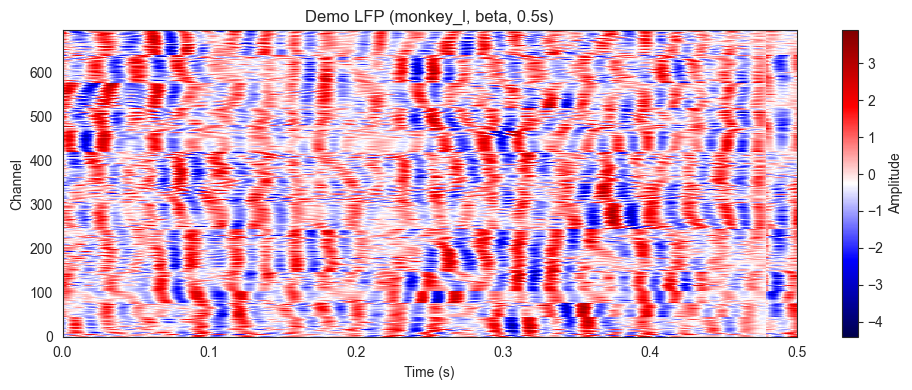

In [3]:
# Load and plot demo LFP data (half a second, any band/monkey) using seismic colormap
import numpy as np
from rf_demo.utils import plot_seismic_data

# Options for monkey and band
monkey_options = ['monkey_l', 'monkey_a']
band_options = ['lfp', 'low', 'alpha', 'beta', 'gamma', 'highgamma']

# Choose monkey and band (edit these as needed)
monkey = 'monkey_l'
band = 'beta'

# Build filename
from rf_demo.config import DATA_DIR
from pathlib import Path
filename = str(Path(DATA_DIR) / f'demo_{monkey}_{band}_15s.npz')

# Load demo data
data = np.load(filename)
lfp = data['lfp']  # shape: channels x time
sampling_rate = 1000
duration = 0.5  # seconds
samples = int(sampling_rate * duration)
lfp_segment = lfp[:, :samples]
time = np.linspace(0, duration, samples)

plot_seismic_data(lfp_segment, time, title=f'Demo LFP ({monkey}, {band}, 0.5s)')

In [4]:
#from rf_demo.utils import plot_ground_truth_cortex_rf
#plot_ground_truth_cortex_rf(monkey='monkey_l')

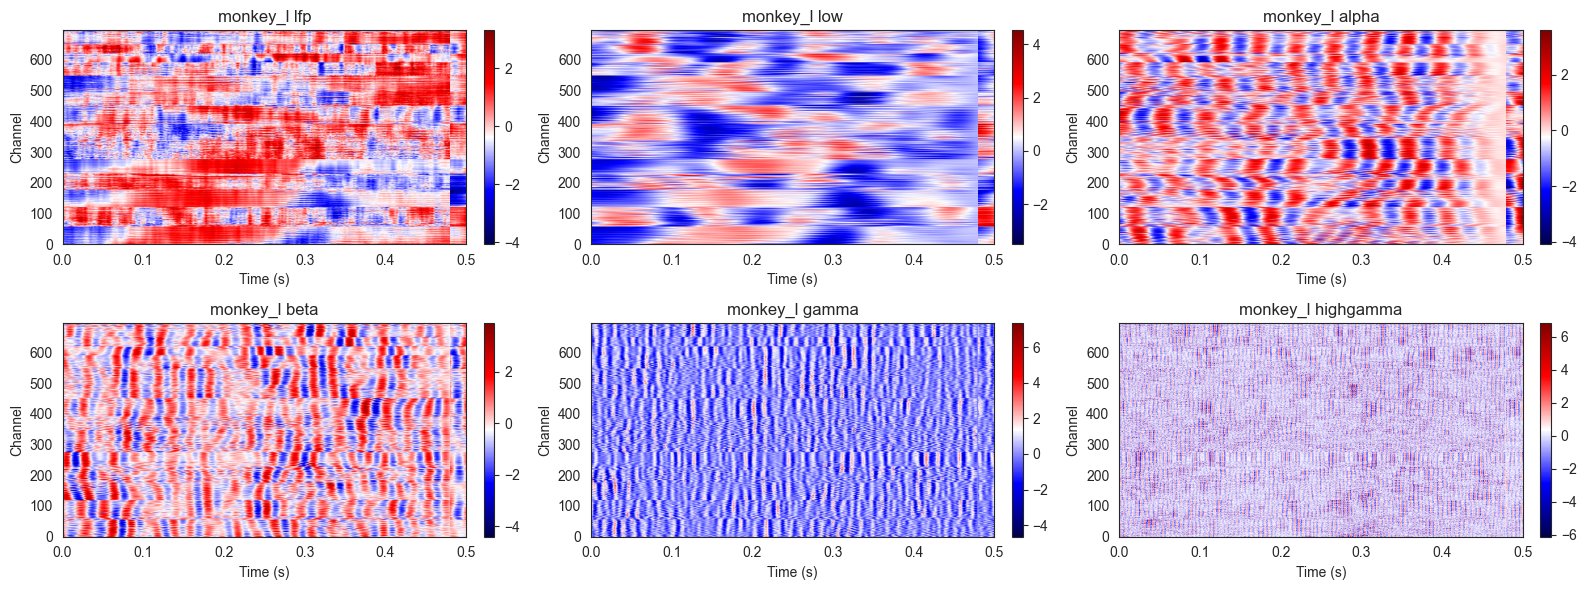

In [5]:
from rf_demo.utils import plot_all_bands_seismic
plot_all_bands_seismic(monkey='monkey_l')

In [6]:
# Run the demo pipeline for monkey_L and show metrics/plots
#output = run_demo_pipeline(monkey='monkey_L', window='15s')

# Define a custom UMAP grid
custom_umap_grid = [
    {"n_neighbors": 10, "min_dist": 0.1},
    {"n_neighbors": 20, "min_dist": 0.2},
    {"n_neighbors": 400, "min_dist": 0.8},
]

# Run the pipeline once with the custom grid
output = run_demo_pipeline(
    monkey='monkey_L',
    window='15s',
    selection_mode='combo',
    umap_grid=custom_umap_grid
)
print('This may take a couple minutes to run...')

Searching UMAP params for LFP...
  Testing UMAP grid:
    n_neighbors=10, min_dist=0.1
    n_neighbors=20, min_dist=0.2
    n_neighbors=400, min_dist=0.8
  Testing UMAP grid:
    n_neighbors=10, min_dist=0.1
    n_neighbors=20, min_dist=0.2
    n_neighbors=400, min_dist=0.8
Best for LFP: score 8.292 (mode: combo)
Searching UMAP params for low...
  Testing UMAP grid:
    n_neighbors=10, min_dist=0.1
    n_neighbors=20, min_dist=0.2
    n_neighbors=400, min_dist=0.8
  Testing UMAP grid:
    n_neighbors=10, min_dist=0.1
    n_neighbors=20, min_dist=0.2
    n_neighbors=400, min_dist=0.8
Best for LFP: score 8.292 (mode: combo)
Searching UMAP params for low...
  Testing UMAP grid:
    n_neighbors=10, min_dist=0.1
    n_neighbors=20, min_dist=0.2
    n_neighbors=400, min_dist=0.8
  Testing UMAP grid:
    n_neighbors=10, min_dist=0.1
    n_neighbors=20, min_dist=0.2
    n_neighbors=400, min_dist=0.8
Best for low: score 7.133 (mode: combo)
Searching UMAP params for alpha...
  Testing UMAP grid:

In [7]:
print('Cortical metrics (MDS):')
print(annotate_metrics(output.mds.metrics.items()))
print('\nCortical metrics (UMAP tuned):')
print(annotate_metrics(output.umap_best.metrics.items()))
if output.umap_best.surrogate_metrics:
    print('\nUMAP surrogate metrics (MDS space):')
    print(annotate_metrics(output.umap_best.surrogate_metrics.items()))
if 'freq_band' in output.umap_best.params:
    print(f"\nWinning frequency band: {output.umap_best.params['freq_band']}")

# Print combo errors for all UMAP candidates
if hasattr(output, 'umap_candidates') and output.umap_candidates:
    print('\nUMAP candidate combo errors:')
    for params, metrics in output.umap_candidates:
        combo_error = metrics.get('rmse', 0) + 3.0 * (1 - metrics.get('iedc', 0))
        print(f"Band: {params.get('freq_band', ''):8} n_neighbors: {params.get('n_neighbors', ''):2} min_dist: {params.get('min_dist', ''):4}  RMSE: {metrics.get('rmse', 0):.4f}  IEDC: {metrics.get('iedc', 0):.4f}  Combo: {combo_error:.4f}")

Cortical metrics (MDS):
cortical_corr: 0.558
cortical_rmse: 4.143
visual_corr: 0.779
visual_rmse: 1.005

Cortical metrics (UMAP tuned):
cortical_corr: 0.498
cortical_rmse: 5.666
visual_corr: 0.334
visual_rmse: 1.492

UMAP surrogate metrics (MDS space):
iedc: 0.330
rmse: 3.652

Winning frequency band: highGamma

UMAP candidate combo errors:
Band: LFP      n_neighbors: 10.0 min_dist:  0.1  RMSE: 15.7290  IEDC: 0.8124  Combo: 16.2918
Band: LFP      n_neighbors: 20.0 min_dist:  0.2  RMSE: 19.0645  IEDC: 0.7395  Combo: 19.8462
Band: LFP      n_neighbors: 400.0 min_dist:  0.8  RMSE: 7.2810  IEDC: 0.6630  Combo: 8.2920
Band: low      n_neighbors: 10.0 min_dist:  0.1  RMSE: 16.3413  IEDC: 0.7398  Combo: 17.1220
Band: low      n_neighbors: 20.0 min_dist:  0.2  RMSE: 18.9005  IEDC: 0.6925  Combo: 19.8229
Band: low      n_neighbors: 400.0 min_dist:  0.8  RMSE: 6.3639  IEDC: 0.7437  Combo: 7.1329
Band: alpha    n_neighbors: 10.0 min_dist:  0.1  RMSE: 14.9508  IEDC: 0.6340  Combo: 16.0488
Band: alp

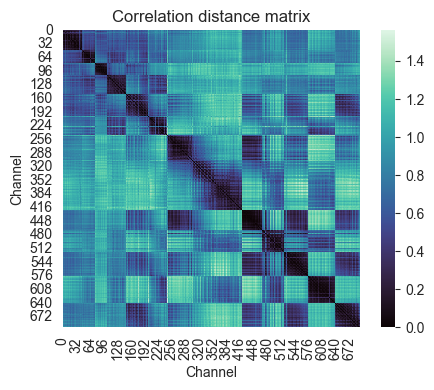

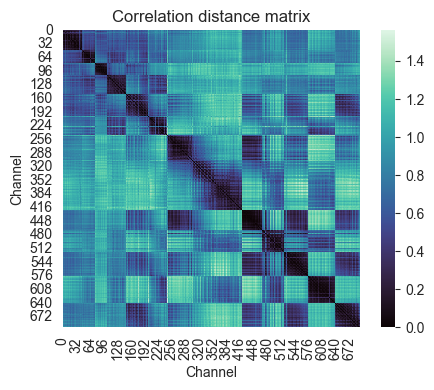

In [8]:
plot_distance_heatmap(output.distance_matrix)

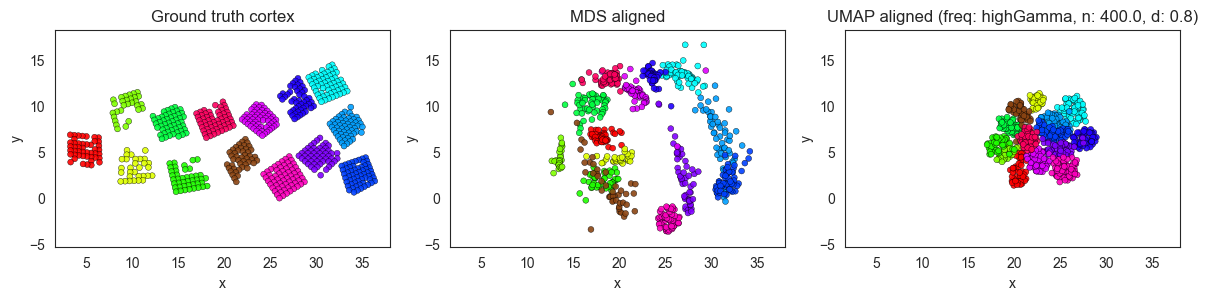

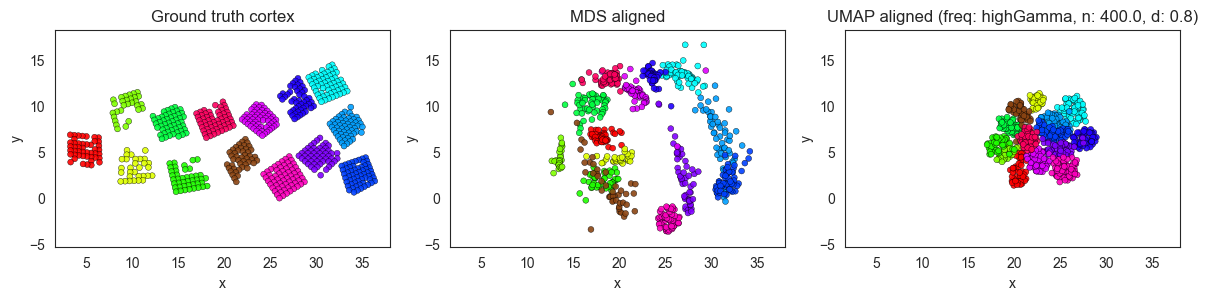

In [9]:
plot_cortex_alignment(output)

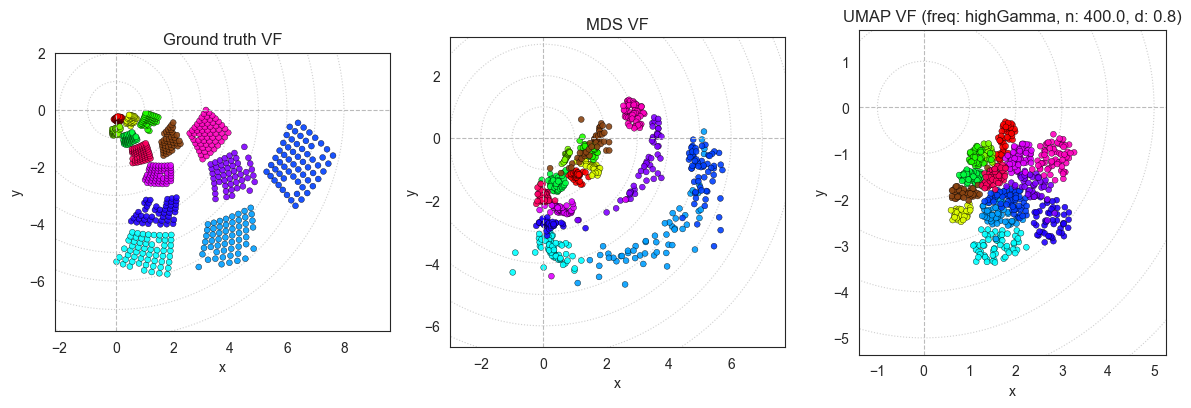

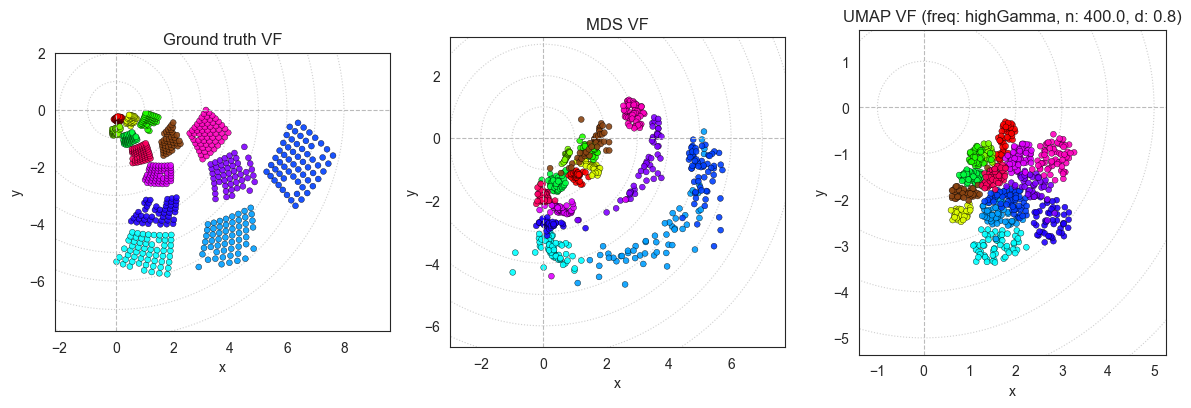

In [10]:
plot_visual_field_projection(output)